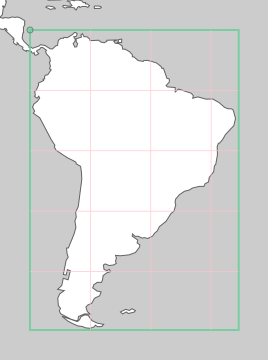

In [1]:
from odc.geo.geobox import GeoBox, GeoboxTiles
import geopandas as gp
from tqdm.notebook import tqdm
from lonboard import viz
from cartopy.feature import LAND

dx = 1/3600  # 30m resolution
epsg = 4326
crs = f"epsg:{epsg}"

big_bounds = (-82, -56, -34, 13)

big_box = GeoBox.from_bbox(big_bounds, crs=crs, resolution=dx)
big_box

In [4]:
chunk_shape = (2400, 2400)
tiles = GeoboxTiles(big_box, chunk_shape)
tiles

Tiles: 104x72|2400x2400px => 248_400x172_800px

In [5]:
land_tiles = []
for n, idx in enumerate(tqdm(list(tiles._all_tiles()))):
    tile = tiles[idx]
    bbox = tile.boundingbox
    extent = bbox.left, bbox.right, bbox.bottom, bbox.top
    igeoms = list(LAND.intersecting_geometries(extent))
    is_land = len(igeoms) > 0
    if is_land:
        land_tiles.append((n, tile))


  0%|          | 0/7488 [00:00<?, ?it/s]

In [6]:
s = gp.GeoSeries([tile[1].geographic_extent for tile in land_tiles], crs=crs)
s

0       POLYGON ((-82.00000 13.00000, -82.00000 12.333...
1       POLYGON ((-72.00000 13.00000, -72.00000 12.333...
2       POLYGON ((-71.33333 13.00000, -71.33333 12.333...
3       POLYGON ((-70.66667 13.00000, -70.66667 12.333...
4       POLYGON ((-70.00000 13.00000, -70.00000 12.333...
                              ...                        
3801    POLYGON ((-35.33333 -55.00000, -35.33333 -55.6...
3802    POLYGON ((-34.66667 -55.00000, -34.66667 -55.6...
3803    POLYGON ((-68.66667 -55.66667, -68.66667 -56.0...
3804    POLYGON ((-68.00000 -55.66667, -68.00000 -56.0...
3805    POLYGON ((-67.33333 -55.66667, -67.33333 -56.0...
Length: 3806, dtype: geometry

In [8]:
viz(s, solid_polygon_kwargs={"filled": True, "wireframe": True})

Map(basemap_style=<CartoBasemap.DarkMatter: 'https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json'…